# Image Loading and conversion

In [150]:
#import libraries

import cv2
import matplotlib.pyplot as plt
import imutils


In [151]:
#load image
image=cv2.imread('test.jpg')


In [152]:
#convert to Grayscale
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#convert to 24 bit BGR channel image to RGB channel
gray_image=cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB)


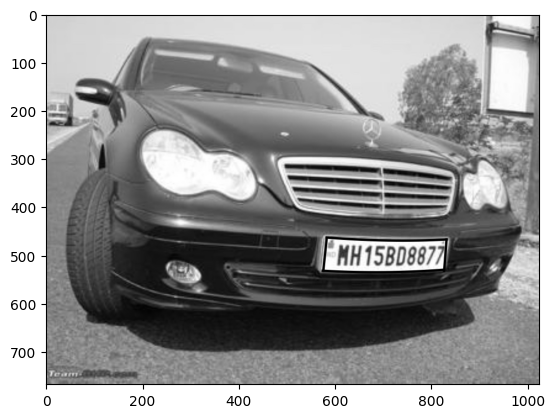

In [153]:
#plot image
plt.imshow(gray_image)
plt.show()

## Apply filter to find edges
```
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```
>Choosing appropriate values for the d, sigmaColor, and sigmaSpace parameters in cv2.bilateralFilter() is important to achieve the desired level of smoothing while preserving edges and details in the image. Here are some general guidelines for choosing these parameters:

* d:

>This parameter determines the size of the pixel neighborhood used during filtering. Typically, a value of 5 to 10 is used for smaller images, while larger images may require larger values of d. Increasing the value of d will result in more smoothing across larger areas of the image.
* sigmaColor:

>This parameter controls the color dissimilarity between pixels that will be smoothed. A larger value of sigmaColor will result in more dissimilarity being removed, while a smaller value will preserve more of the original color information. Typically, a value of 10 to 50 is used for this parameter.
* sigmaSpace:

>This parameter controls the spatial dissimilarity between pixels that will be smoothed. A larger value of sigmaSpace will result in more smoothing across larger distances, while a smaller value will preserve more of the original image structure. Typically, a value of 10 to 150 is used for this parameter.

>In general, choosing appropriate values for these parameters involves balancing the amount of smoothing needed to achieve the desired effect with the need to preserve important details and edges in the image. Experimenting with different values for these parameters can help determine the best values for a particular image and task.

In [154]:
#Apply bilateral filter 
filter=cv2.bilateralFilter(gray_image,10,17,17)


### Egde detection
> `cv2.Canny()` is an edge detection algorithm in OpenCV used to detect a wide range of edges in an image.
```
cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

```

>The cv2.Canny() function takes the following parameters:
> * image: The input image, usually grayscale.
> * threshold1: The lower threshold value to detect edges.
> * threshold2: The higher threshold value to detect edges.
> * edges: An optional output array to store the edges found. If not provided, a new image will be created.
> * apertureSize: An optional parameter that sets the size of the Sobel kernel used to calculate image gradients. By default, it is set to 3.
> * L2gradient: An optional parameter that specifies whether to use the L2 norm to calculate gradients. By default, it is set to False, which means the L1 norm is used.


In [155]:
#find egdes

edge=cv2.Canny(filter,30,200)

#convert image to rgb channel
image_edges=cv2.cvtColor(edge,cv2.COLOR_BGR2RGB)


[]

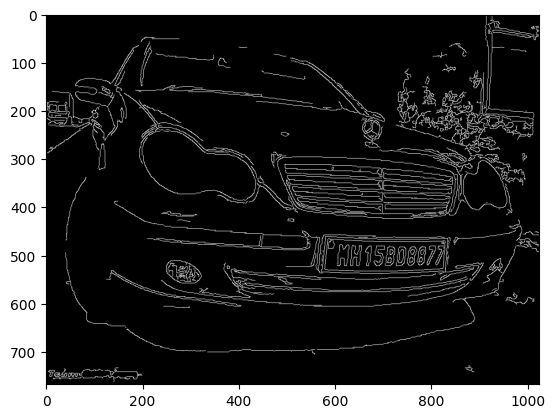

In [156]:
#plot image edges

plt.imshow(image_edges)
plt.plot()

### Locate the number plate

> Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

```
cv2.findContours()
```
>RETR_TREE finds all the promising contour lines and reconstructs a full hierarchy of nested contours. The method cv2. CHAIN_APPROX_SIMPLE returns only the endpoints that are necessary for drawing the contour line.

In [157]:
#find keypoints 
coordinates=cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#locate
contours=imutils.grab_contours(coordinates)

contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [158]:
contours

[array([[[586, 466]],
 
        [[585, 467]],
 
        [[585, 470]],
 
        [[584, 471]],
 
        [[584, 479]],
 
        [[583, 480]],
 
        [[583, 489]],
 
        [[582, 490]],
 
        [[582, 498]],
 
        [[581, 499]],
 
        [[581, 508]],
 
        [[580, 509]],
 
        [[580, 518]],
 
        [[579, 519]],
 
        [[579, 527]],
 
        [[578, 528]],
 
        [[579, 529]],
 
        [[579, 530]],
 
        [[584, 530]],
 
        [[585, 531]],
 
        [[606, 531]],
 
        [[607, 532]],
 
        [[638, 532]],
 
        [[639, 533]],
 
        [[730, 533]],
 
        [[731, 532]],
 
        [[762, 532]],
 
        [[763, 531]],
 
        [[784, 531]],
 
        [[785, 530]],
 
        [[801, 530]],
 
        [[802, 529]],
 
        [[817, 529]],
 
        [[818, 528]],
 
        [[824, 528]],
 
        [[824, 526]],
 
        [[825, 525]],
 
        [[825, 513]],
 
        [[826, 512]],
 
        [[826, 500]],
 
        [[827, 499]],
 
        [[827, 4

In [159]:

#import numpy

import numpy as np

>The function `cv2.approxPolyDP(input_curve,epsilon,closed)` approximates a curve or a polygon with another curve/polygon with less vertices so that the distance between them is less or equal to the specified precision.
where
>* input_curve represents the input polygon whose contour must be approximated with specified precision
>* epsilon represents the maximum distance between the approximation of a shape contour of the input polygon and the original input polygon
>* closed is a Boolean value whose value is true if the approximated curve is closed or the value is false if the approximated curve is not closed



### Working of `approxPolyDP()` function in OpenCV
> * The process of approximating the shape of a contour of a given polygon to the shape of the original polygon to the specified precision is called approximation of a shape of the contour.
> * We make use of a function in OpenCV called approxPolyDP() function to perform an approximation of a shape of a contour.
> * The image of a polygon whose shape of a contour must be approximated is read using the imread() function.
> * Then the input image is converted into a grayscale image.
> * Then thresholding function is applied on the grayscale image to convert it into a binary image.
> * Then the contours present in the image are determined using findContours() function.
> * Then for each of the contours determined in the image, the approxPolyDP() function is applied to determine the shape of the polygons present in the image.
> * Then the determined shape of the contours is drawn on the image using drawContours() function and then displayed as the output of the program.


In [160]:
#find location of number plate

for point in contours:
    approx=cv2.approxPolyDP(point,10,True)
    if len(approx)==4:
        area=approx
        break


In [161]:
area

array([[[578, 528]],

       [[824, 528]],

       [[829, 472]],

       [[586, 466]]], dtype=int32)

### Apply mask

In [162]:
mask=np.zeros(gray_image.shape[0:2],dtype='uint8')


#### Generate new image using drawContours() function
```
drawContours(image,contours,contourIdx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offset]]]]])
```

#### Perform bitwise AND to merge those images
```
bitwise_and(source1_array, source2_array, destination_array, mask)
```

In [163]:
numberplate=cv2.drawContours(mask,[area],0,255,-1)

In [164]:
#merge

numberplate=cv2.bitwise_and(image,image,mask=mask)

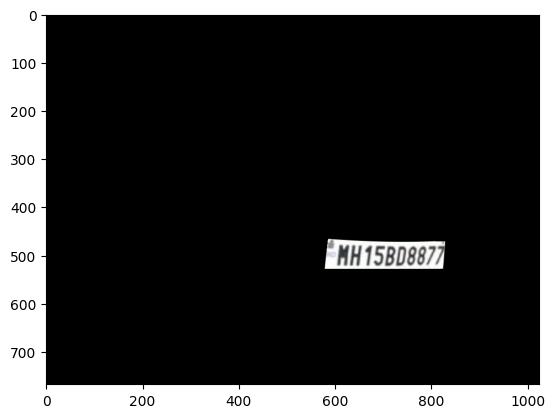

In [165]:
plt.imshow(cv2.cvtColor(numberplate,cv2.COLOR_BGR2RGB))
plt.show()

In [166]:
#crop image using coordinates
#select x,y coordinates where mask colour is black

(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

cropped_image=image[x1:x2+1,y1:y2+1]


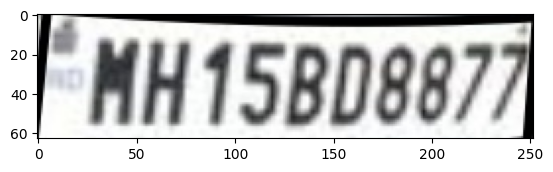

In [167]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.show()

In [168]:
#Apply OCR

import easyocr

reader=easyocr.Reader(['en'],gpu=True)
result=reader.readtext(cropped_image)

result

[([[18, 4], [252, 4], [252, 63], [18, 63]], 'HH75BD8877', 0.5418804022072953)]

In [169]:
#Show result
text=''
for i in range(len(result)):
    text+=result[i][-2]
print(text)
accuracy=[]
for i in  range(len(result)):
    accuracy.append(result[i][-1])
accuracy=str(round(np.mean(accuracy )*100,4))+"%"
print("Accuracy : "+accuracy)

HH75BD8877
Accuracy : 54.188%


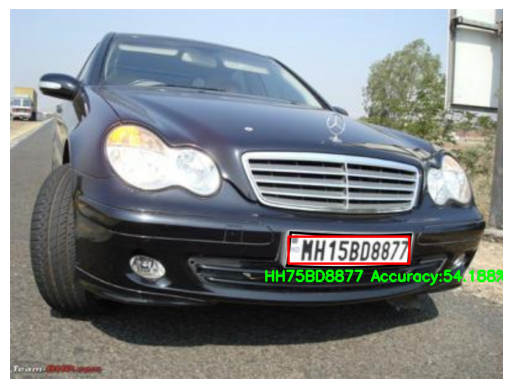

In [170]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
text=text+" Accuracy:"+accuracy
# Select the font and get the text size
font = cv2.FONT_HERSHEY_SIMPLEX
text_size, _ = cv2.getTextSize(text, font, 1, 2)

# Calculate the position to render the text just below the license plate
org = (approx[0][0][0] - 50, approx[2][0][1] + text_size[1] + 70)  # Adjust the position based on your requirements
color = (0, 255, 0)  # Green color (you can change it as needed)
thickness = 4
line_type = cv2.LINE_8
render = cv2.putText(image_rgb, text, org, font, 1, color, thickness, line_type)

# Draw a rectangle around the license plate
rectangle_color = (255, 0, 0)  # Blue color (you can change it as needed)
render = cv2.rectangle(image_rgb, tuple(approx[0][0]), tuple(approx[2][0]), rectangle_color, 3)

# Display the rendered image using Matplotlib
plt.imshow(render)
plt.axis('off')  # Remove axis ticks and labels
plt.show()